# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [252]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [289]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [290]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [255]:
df_train.shape

(15223, 52)

In [291]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [257]:
df_test.shape

(14910, 52)

In [258]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [293]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [294]:
df = df_test.append(df_train).reset_index(drop=True)

In [261]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [263]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее специальное', 'Ученая степень', 'Среднее', 'Неоконченное высшее', 'Неполное среднее', 'Два и более высших образования', 'Высшее'}


MARITAL_STATUS
{'Состою в браке', 'Не состоял в браке', 'Разведен(а)', 'Вдовец/Вдова', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Недвижимость', 'Управляющая компания', 'Ресторанный бизнес/Общественное питание', 'Информационные технологии', 'Маркетинг', 'Металлургия/Промышленность/Машиностроение', 'Транспорт', 'Наука', 'Химия/Парфюмерия/Фармацевтика', 'Логистика', 'Коммунальное хоз-во/Дорожные службы', 'Страхование', 'Банк/Финансы', 'Салоны красоты и здоровья', 'Юридические услуги/нотариальные услуги', 'Развлечения/Искусство', 'Торговля', 'Туризм', 'Здравоохранение', 'Строительство', 'Сборочные производства', 'Другие сферы', 'Нефтегазовая промышленность', 'Государственная служба', 'ЧОП/Детективная д-ть', 'Сельское хозяйство', 'СМИ/Реклама/PR-агенства', 'Образование', 'Подбор персонала', 'Информационные услуги', 'Энергетика'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

In [22]:
df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
df['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
df['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [40]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

sample
{'train'}




Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [16]:
#df = preproc_data(df)
df.isnull().mean()

# не заполнены поля о работе - заменим на Нет данных. Не буду мешать с категорией Другое, т.к. тут вероятно и безработные.
# GEN_INDUSTRY                  0.090034
# GEN_TITLE                     0.090034
# ORG_TP_STATE                  0.090034
# JOB_DIR                       0.090034

# не заполнены поля о работе - заменим на Без участия, чтобы не плодить новой категории
# ORG_TP_FCAPITAL               0.089868

# заменяем на 0
# WORK_TIME                     0.090167

# заполняем областью фактического проживания
# TP_PROVINCE                   0.019580

# найти офис из этой же области проживания и дозаполнить
# REGION_NM                     0.000066

# заменяем на 0, как не было карты
# PREVIOUS_CARD_NUM_UTILIZED    0.980088

AGREEMENT_RK                  0.000000
TARGET                        0.000000
AGE                           0.000000
SOCSTATUS_WORK_FL             0.000000
SOCSTATUS_PENS_FL             0.000000
GENDER                        0.000000
CHILD_TOTAL                   0.000000
DEPENDANTS                    0.000000
EDUCATION                     0.000000
MARITAL_STATUS                0.000000
GEN_INDUSTRY                  0.090034
GEN_TITLE                     0.090034
ORG_TP_STATE                  0.090034
ORG_TP_FCAPITAL               0.089868
JOB_DIR                       0.090034
FAMILY_INCOME                 0.000000
PERSONAL_INCOME               0.000000
REG_ADDRESS_PROVINCE          0.000000
FACT_ADDRESS_PROVINCE         0.000000
POSTAL_ADDRESS_PROVINCE       0.000000
TP_PROVINCE                   0.019580
REGION_NM                     0.000066
REG_FACT_FL                   0.000000
FACT_POST_FL                  0.000000
REG_POST_FL                   0.000000
REG_FACT_POST_FL         

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [37]:
#  закодировать категориальные признаки
# EDUCATION
# MARITAL_STATUS
# GEN_INDUSTRY
# GEN_TITLE
# ORG_TP_STATE
# ORG_TP_FCAPITAL
# JOB_DIR
# FAMILY_INCOME
# REGION_NM

#label.fit(data.Sex.drop_duplicates()) #задаем список значений для кодирования
#dicts['Sex'] = list(label.classes_)
#data.Sex = label.transform(data.Sex)


# можно ли использовать один справочник кодов для полей с одинаковым набором значений?
# REG_ADDRESS_PROVINCE
# FACT_ADDRESS_PROVINCE
# POSTAL_ADDRESS_PROVINCE
# TP_PROVINCE



#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [295]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    
    ## Your Code Here
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)

    #преобразование в числа
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')    
    
    #заполнение строк с пустыми значениями
    df_output['GEN_INDUSTRY'] = df_output['GEN_INDUSTRY'].map(lambda x: x if type(x) is str else 'Нет данных')
    df_output['GEN_TITLE'] = df_output['GEN_TITLE'].map(lambda x: x if type(x) is str else 'Нет данных')
    df_output['ORG_TP_STATE'] = df_output['ORG_TP_STATE'].map(lambda x: x if type(x) is str else 'Нет данных')
    df_output['JOB_DIR'] = df_output['JOB_DIR'].map(lambda x: x if type(x) is str else 'Нет данных')
    
    df_output['ORG_TP_FCAPITAL'] = df_output['ORG_TP_FCAPITAL'].map(lambda x: x if type(x) is str else 'Без участия')

    df_output['WORK_TIME'] = df_output['WORK_TIME'].map(lambda x: x if x == x else 0)
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].map(lambda x: x if x == x else 0)

    #подставляем в TP_PROVINCE значения из FACT_ADDRESS_PROVINCE
    for i in range(len(df_output['TP_PROVINCE'])):
        if df_output.loc[i, 'TP_PROVINCE'] != df_output.loc[i, 'TP_PROVINCE']:
            df_output.loc[i, 'TP_PROVINCE'] = df_output.loc[i, 'FACT_ADDRESS_PROVINCE']

    #подставляем в TP_PROVINCE значения из FACT_ADDRESS_PROVINCE
    for i in range(len(df_output['REGION_NM'])):
        if df_output.loc[i, 'REGION_NM'] != df_output.loc[i, 'REGION_NM']:
            df_output.loc[i, 'TP_PROVINCE'] = df_output.loc[i, 'FACT_ADDRESS_PROVINCE']

    #посмотрел, что пропуски только в Новосибирске.
    #так понимаю, что правильно будет учитывать возможные пропуски и в других регионах, иначе для другой тестовой выборки может быть иначе
    for i in range(len(df_output['REGION_NM'])):
        if df_output.loc[i, 'REGION_NM'] != df_output.loc[i, 'REGION_NM']:
            df_output.loc[i, 'REGION_NM'] = 'ЗАПАДНО-СИБИРСКИЙ'

    #кодирование категориальных признаков через hash
    k = 1
    df_output['EDUCATION'] = df_output['EDUCATION'].map(hash)%k
    df_output['MARITAL_STATUS'] = df_output['MARITAL_STATUS'].map(hash)%k
    df_output['GEN_INDUSTRY'] = df_output['GEN_INDUSTRY'].map(hash)%k
    df_output['GEN_TITLE'] = df_output['GEN_TITLE'].map(hash)%k
    df_output['ORG_TP_STATE'] = df_output['ORG_TP_STATE'].map(hash)%k
    df_output['ORG_TP_FCAPITAL'] = df_output['ORG_TP_FCAPITAL'].map(hash)%k
    df_output['JOB_DIR'] = df_output['JOB_DIR'].map(hash)%k
    df_output['FAMILY_INCOME'] = df_output['FAMILY_INCOME'].map(hash)%k
    df_output['REGION_NM'] = df_output['REGION_NM'].map(hash)%k
    df_output['REG_ADDRESS_PROVINCE'] = df_output['REG_ADDRESS_PROVINCE'].map(hash)%k
    df_output['FACT_ADDRESS_PROVINCE'] = df_output['FACT_ADDRESS_PROVINCE'].map(hash)%k
    df_output['POSTAL_ADDRESS_PROVINCE'] = df_output['POSTAL_ADDRESS_PROVINCE'].map(hash)%k
    df_output['TP_PROVINCE'] = df_output['TP_PROVINCE'].map(hash)%k
     
            
    return df_output

#preproc_data (df_train)

In [296]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [297]:
#X, y = df_preproc.iloc[:, :-1].values, df_preproc.iloc[:, -1].values

X = df_train_preproc.iloc[:, 1:].values
y = df_train_preproc.iloc[:, 0].values

X_test = df_test_preproc.iloc[:, 1:].values
y_test = df_test_preproc.iloc[:, 0].values


#### Задание 5. Обучение и оценка качества разных моделей

In [298]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [299]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
#DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42, max_depth=6)
dtc.fit(X1_train, y1_train)
y_hat_dtc = dtc.predict(X1_test)
y_hat_proba_dtc = dtc.predict_proba(X1_test)

#RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_depth=5)
rfc.fit(X1_train, y1_train)
y_hat_rfc = rfc.predict(X1_test)
y_hat_proba_rfc = rfc.predict_proba(X1_test)

#LogisticRegression
lr = DecisionTreeClassifier(random_state=42, max_depth=6)
lr.fit(X1_train, y1_train)
y_hat_lr = lr.predict(X1_test)
y_hat_proba_lr = lr.predict_proba(X1_test)



In [246]:
y_hat_proba_lr

array([[0.64976959, 0.35023041],
       [0.64976959, 0.35023041],
       [0.88417508, 0.11582492],
       ...,
       [0.94679565, 0.05320435],
       [0.85020661, 0.14979339],
       [0.94679565, 0.05320435]])

In [300]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

## Your Code Here
accuracy_dtc = accuracy_score(y1_test, y_hat_dtc)
precision_dtc = precision_score(y1_test, y_hat_dtc)    
recall_dtc = recall_score(y1_test, y_hat_dtc)    

accuracy_rfc = accuracy_score(y1_test, y_hat_rfc)
precision_rfc = precision_score(y1_test, y_hat_rfc)    
recall_rfc = recall_score(y1_test, y_hat_rfc)    

accuracy_lr = accuracy_score(y1_test, y_hat_lr)
precision_lr = precision_score(y1_test, y_hat_lr)    
recall_lr = recall_score(y1_test, y_hat_lr)    

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [301]:
precision_dtc, recall_dtc, thresholds_dtc = precision_recall_curve(y1_test, y_hat_proba_dtc[:,1])
precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(y1_test, y_hat_proba_rfc[:,1])
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y1_test, y_hat_proba_lr[:,1])

(-0.01, 1.01)

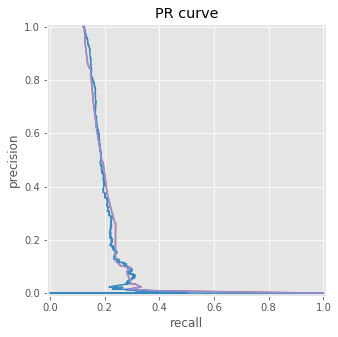

In [302]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
plt.figure(figsize=(5, 5))
plt.plot(precision_dtc, recall_dtc)
plt.plot(precision_rfc, recall_rfc)
plt.plot(precision_lr, recall_lr)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

Text(0.5,1,'ROC curve')

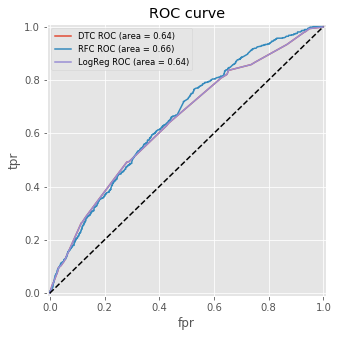

In [303]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
from sklearn.metrics import auc

fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y1_test, y_hat_proba_dtc[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y1_test, y_hat_proba_rfc[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y1_test, y_hat_proba_lr[:,1])
roc_auc_dtc  = auc(fpr_dtc, tpr_dtc)
roc_auc_rfc  = auc(fpr_rfc, tpr_rfc)
roc_auc_lr  = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(5, 5))
plt.plot(fpr_dtc, tpr_dtc, label='%s ROC (area = %0.2f)' % ('DTC', roc_auc_dtc))
plt.plot(fpr_rfc, tpr_rfc, label='%s ROC (area = %0.2f)' % ('RFC', roc_auc_rfc))
plt.plot(fpr_lr, tpr_lr, label='%s ROC (area = %0.2f)' % ('LogReg', roc_auc_lr))
plt.legend(loc=0, fontsize='small')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')



In [304]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
#cv = KFold(n_splits=3, random_state=123)

## Your Code Here
scores_dtc = cross_val_score(dtc, X, y, scoring='roc_auc', cv = cv)
## не разобрался в чём тут проблема??


TypeError: 'StratifiedKFold' object is not iterable

In [305]:
scores_dtc = cross_val_score(dtc, X, y, scoring='roc_auc')
scores_rfc = cross_val_score(rfc, X, y, scoring='roc_auc')
scores_lr = cross_val_score(lr, X, y, scoring='roc_auc')
print(scores_dtc.mean())
print(scores_rfc.mean())
print(scores_lr.mean())

0.6139938759932471
0.6563234267041839
0.6139938759932471


In [306]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here
rfc.fit(X_test, y_test)
y_hat_rfc = rfc.predict(X_test)
y_hat_proba_rfc = rfc.predict_proba(X_test)


In [307]:
# Померить roc_auc на тесте

scores = cross_val_score(
    rfc,
    X_test,
    y_test,
    scoring='roc_auc'
)

In [308]:
scores.mean()

0.6597911291626505